In [1]:
import numpy as np
import matplotlib.pyplot as plt

# there are 28*28=784 pixels in each image
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "data/"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 

# Introduction

We classify handwritten digits from the MNIST database using Principal Component Analysis. The effectivness of the classification is compared to that of the centroid classifier that classifies an integer with the label that minimizes the the euclidean distance from the mean of that label in the training data. Using $5$ principal components increases the accuracy of the classification with about $14 \%$ from the centroid method.

## The data

The datasets <code>train_data</code> and <code>test_data</code> are arrays where each element is itself an array of length $785$; the first element of this array of length $785$ is the label of the picture - i.e. says which number the picture represents - and the remaining $784$ elements are the pixels of the image - each pixel taking a value in the range $[0, 255]$.

In [37]:
train_data[:5]

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [20]:
# length of first element in training dataset
print(len(train_data[0]))

# print the first three labels
for i in range(3):
    print(train_data[i][0])

785
5.0
0.0
4.0


Below is the number of pixels in the first image in the training dataset that has the value $253$ and the value $255$.

In [35]:
print(sum(train_data[0]==253),
      sum(train_data[0]==255),
      sep='\n')

54
1


## Printing images

Below is how to print the images in the dataset with </code>.imshow()</code> from Matplotlib.pyplot.

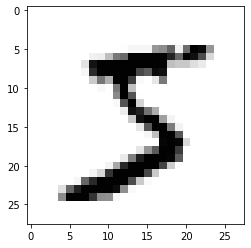

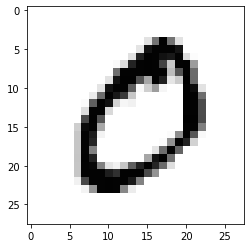

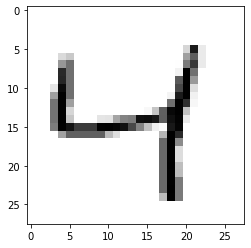

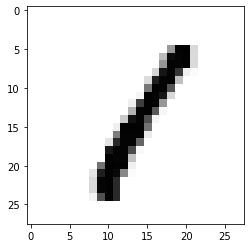

In [70]:
for i in range(4):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

### Printing the mean of an integer
To print the mean image of an integer, we first need to extract the images from a particular label. To select the rows corresponding to the label <code>0</code> we use the Boolean mask <code>zeros = train_data[:, 0] == 0</code> (the condition says: all rows where the 0:th column equals $0$). After masking for the rows that are labeled zero, we exclude the first column (that contains the label).

We then calculate the mean array by <code>np.mean( , axis=0)</code> over the rows. 

Lastly, we convert the *mean* array to the shape 28x28 and print as above.

Below, first the mean of $O$ is printed, then all the means.

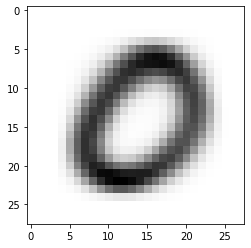

In [211]:
# mask for rows labeled 0
mask = train_data[:, 0] == 0
zeros = train_data[mask][:, 1:]
zeros_mean = np.mean(zeros, axis=0)
img = zeros_mean.reshape((28,28))
plt.imshow(img, cmap="Greys")
plt.show()

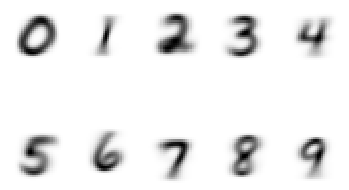

In [212]:
# create a layot of 10 subplots
fig, axs = plt.subplots(2,5)

# flatten axs to be able to loop over a one-dim index
axs = axs.flat

for i in range(10):
    # mask for rows labeled i
    mask = train_data[:, 0] == i
    filtered_data = train_data[mask][:, 1:]
    filtered_data_means = np.mean(filtered_data, axis=0)
    img = filtered_data_means.reshape((28,28))
    axs[i].imshow(img, cmap="Greys")
    axs[i].set_axis_off()
plt.show()

# Part 1: The centroid method

#### Step a: Calculate the distance between the means and the test image

We need to be able to calculate the distnace between a digit and the means from the 10 different labels in the training dataset. To do so we calculate the means for each label in a for loop and store the mean arrays in a matrix.

In [4]:
means = np.empty((10, 784))
for i in range(10):
    # mask for rows labeled i
    mask = train_data[:, 0] == i
    filtered_data = train_data[mask][:, 1:]
    filtered_data_means = np.mean(filtered_data, axis=0) 
    means[i] = filtered_data_means


In [58]:
means.shape

(10, 784)

Given a single digit we may calculate a list of 10 distances (the norm used here is the Euclidian norm) - one distance for each mean digit.

To get the index of the minimum of the list of distances we may use
<code>
min_val = min(list)
index_min = list.index(min_val).
</code>

In [134]:
digit = test_data[0]
distances = []

for i in range(10):
    dist = np.linalg.norm(means[i] - digit[1:])
    distances.append(dist)

min_dist = min(distances)
index_min = distances.index(min_dist)

print('Label of the digit is ', digit[0].astype(int))
print('The minimum distance is to the mean of label: ', index_min)


Label of the digit is  7
The minimum distance is to the mean of label:  7


To avoid a for loop we could subtract <code>digit[1:]</code> from each row in the mean array (for this to work we need to have <code>digit[1:]</code> of shape (784,) and not (784) (?)) and then call <code>np.linalg.norm()</code> on each row (by the keyword argument <code>axis=1</code>) on the array of differences.

To get the index of the minimum of the array we may use
<code>
index = np.argmin(np_array).
</code>

In [149]:
digit = test_data[0]

differences = means - digit[1:]

# calculate norm for each row, i.e. along axis 1
distances = np.linalg.norm(differences, axis=1)

index_min = np.argmin(distances)

print('Label of the digit is ', digit[0].astype(int))
print('The minimum distance is to the mean of label: ', index_min)

Label of the digit is  7
The minimum distance is to the mean of label:  7


#### Step b: Classify a set of digits

We would now like to turn the above into a function that takes two arguments: (1) an array of $n$ digits - that is an $n$ by $784$ array - and (2) an $10$-by-$784$ array of the mean digits. The function then returns the $n$ predicted labels.

We define a function that relies on the broadcasting of NumPy to handle operations between different shapes.

In [2]:
def centroid_classifier(data, means):
    
    differences = data - means[:, None]
    
    distances = np.linalg.norm(differences, axis=2)
    
    return np.argmin(distances, axis=0)

#### Step c: Report the success rate (correct/total) of each digit


To che the total number of correct labels we could use:

In [63]:
labeled_data = centroid_classifier(test_data[:, 1:], means)
sum(labeled_data == test_data[:, :1].flatten())

8203

To check to success rate of a particular number we would have to use a mask:

In [64]:
mask = test_data[:, :1].flatten() == 0

sum(labeled_data[mask] == 0) / sum(mask)

0.8959183673469387

To report the success rate of each digit we would then use a loop:

In [5]:
labeled_data = centroid_classifier(test_data[:, 1:], means)
success_rates_centroid = np.zeros(10)
for i in range(10):
    mask = test_data[:, :1].flatten() == i
    
    success_rate =  sum(labeled_data[mask] == i) / sum(mask)
    success_rates_centroid[i] = success_rate
    
    print('success rate for' + str(i) + ': ', 
          success_rate
         )

success rate for0:  0.8959183673469387
success rate for1:  0.9621145374449339
success rate for2:  0.7567829457364341
success rate for3:  0.805940594059406
success rate for4:  0.8258655804480651
success rate for5:  0.6860986547085202
success rate for6:  0.8632567849686847
success rate for7:  0.8326848249027238
success rate for8:  0.7371663244353183
success rate for9:  0.8067393458870169


# Part 2: The PCA Method

#### Step a: FInd the principal components of the training set

Find the first five singular vectors of the *transpose* of the training data labeled three.

In [328]:
mask = train_data[:, 0] == 3

train3 = train_data[:, 1:][mask]

# get SVD
u, s, v = np.linalg.svd(train3.T)

In [329]:
u[:, :5].shape

(784, 5)

We may extract the part of the "information" of the training set ( labeled three) from the first five singular vectors (both left and right) and the first five singular values.

In [243]:
reduced_img = u[:, :5] @ np.diag(s[:5]) @ v[:5, :]

As is illustrated below, the first image from the training set looks quiete much like the first image from the reduced training set.

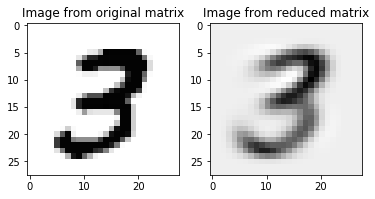

In [256]:
_, axs = plt.subplots(1,2)

axs[0].imshow(train3[0].reshape(28, 28), cmap="Greys")
axs[0].set_title('Image from original matrix')

axs[1].imshow(reduced_img.T[0].reshape(28, 28), cmap="Greys")
axs[1].set_title('Image from reduced matrix')

plt.show()

We now define matrices

$$
\mathrm U_k, \quad k=0, \dots, 9
$$

as matrices consisting of the first five left-singular vectors from the SVD of the $k$:th labeled training data.

Further, given any image $z$, we minimize the distance from $z$ to

$$
\mathrm U_k x, \quad x \in \mathbb R^5 (?).
$$

The minimum is given by

$$
\|z - \mathrm U_k \mathrm U_k^T z \|.
$$

The classification we now deploy is to classify an image $z$ as number $k$ where $k$ gives the minim of

$$
\|z - \mathrm U_k \mathrm U_k^T z \|, \quad k=0, \dots, 9.
$$

Below we verify that <code>z</code> (which of course is of shape <code>(784,)</code>) is comparable to <code>u[:, :5] @ u[:, :5].T</code>.

In [332]:
print((u[:, :5] @ u[:, :5].T).shape, 
      ((u[:, :5] @ u[:, :5].T) @ test_data[0][1:]).shape, 
      sep='\n')

(784, 784)
(784,)


We compute the matrices $\mathrm U_k \mathrm U_k^T $ for $k=0, \dots, k=9$ but stack them on top of each other so that we get a matrix $\mathrm U$ of the shape $10 \cdot 784$ by $784$. We may then multiply

$$
\mathrm U z
$$

to get a vector of length $10 \cdot 784$ which we may reshap to be a matrix of shape $10$ by $780$ where the $i$:th row is the vector from 

$$
\mathrm U_i \mathrm U_i^T z.
$$

With the previosly mentioned broadcasting property, NumPy interprets <code>z - U @ U.T @ z</code> as that <code>z</code> gets subtracted (elementwise) from each of the $10$ rows in <code> U @ U.T @ z</code>. We may then calculate the norm of each row in this calculated difference to get the desired output of $\| z - \mathrm U_k \mathrm U_k^T z \|$ for $k=0, \dots, 9$.

In [6]:
U = np.empty((10*784, 784))

for i in range(10):
    mask = train_data[:, 0] == i

    train = train_data[:, 1:][mask]

    u, _, _ = np.linalg.svd(train.T)
    
    U[i*784:(i+1)*784] = u[:, :5] @ u[:, :5].T
    

Lets see if we get the same output as on page 8-9 in the pdf (note that Matlab has indexing starting with 1 but Pyhon has indexing starting with 0):

In [3]:
mask = test_data[:, 0] == 4

train4 = test_data[:, 1:][mask]

np.linalg.norm(train4[13] - \
               (U @ train4[13]).reshape(10, 784), axis=1)

array([2185.93970472, 2171.96741755, 2130.54744718, 2157.26161157,
       1487.30267226, 2120.82023063, 2025.37029377, 1982.42365024,
       1961.78322204, 1731.5566978 ])

We will now write function that classifies an $n$-by-$784$ matrix of $n$ digits. This could be done with a loop, but as mentioned earlier, NumPy is faster if we avoid such loops. Thus we will again deploy NumPy's broadcasting capabilities.

We will use <code>np.einsum()</code> (see [here](https://stackoverflow.com/questions/26089893/understanding-numpys-einsum/26099744) for an exposition). If we look at the shapes of <code>U</code> and <code>test_data[:, 1:]</code> 

In [39]:
print(U.shape,
      test_data[:, 1:].shape,
      sep='\n'
      )

(7840, 784)
(10000, 784)


we see that for each row in the former and for each row in the latter, we want to multiply the element at the <code>j</code>:th column in <code>U</code> with the element at the <code>j</code>:th column in <code>test_data[:, 1:]</code> and then sum. This can be done with

<code>np.einsum('ij,kj->ik')</code>,
    
and should return an element with as many rows as <code>U</code> and as manny columns as <code>test_data[:, 1:]</code> has rows. We verify that this is the case:

In [40]:
(np.einsum('ij,kj->ik', U, test_data[:2, 1:])).shape

(7840, 2)

We could then reshape the returned object to the shape <code>(10, 784, 5)</code> and consider the difference with a singel digit:

In [42]:
(test_data[:2, 1:].T - (np.einsum('ij,kj->ik', U, test_data[:2, 1:])).reshape(10, 784, 2)).shape

(10, 784, 2)

And lastly calculate the norm along the correct axis, here along <code>axis=1</code>, the one which has $784$ elements. Comparing this with a loop with the matrix consisting of the two first rows from the <code>test_data</code> we get the same output.

In [36]:
for i in range(2):
    print(np.linalg.norm(train4[i] - \
               (U @ train4[i]).reshape(10, 784), axis=1))

[1698.18074918 1896.90420857 1604.17464917 1766.37408212 1111.37059019
 1695.19166883 1626.06889005 1547.1939073  1560.92912747 1239.67341953]
[1824.53749056 1779.30270097 1829.09020065 1713.38857658 1395.93186884
 1657.42232378 1767.3290182  1665.01712813 1617.74822231 1533.61132209]


In [38]:
np.linalg.norm(train4[:2].T - (np.einsum('ij,kj->ik', U, train4[:2])).reshape(10, 784, 2),
               axis=1).T

array([[1698.18074918, 1896.90420857, 1604.17464917, 1766.37408212,
        1111.37059019, 1695.19166883, 1626.06889005, 1547.1939073 ,
        1560.92912747, 1239.67341953],
       [1824.53749056, 1779.30270097, 1829.09020065, 1713.38857658,
        1395.93186884, 1657.42232378, 1767.3290182 , 1665.01712813,
        1617.74822231, 1533.61132209]])

We put this in a function:

In [7]:
def pca_classifier(data, U):
    
    # numner of digits in data
    n = data.shape[0]
    
    differences = data[:n].T - (np.einsum('ij,kj->ik', 
                                            U, data[:n])).reshape(10, 784, n)
    
    distances = np.linalg.norm(differences, axis=1)
    
    return np.argmin(distances, axis=0)

In [51]:
pca_classifier(test_data[:2, 1:], U)

array([7, 2], dtype=int64)

In [52]:
test_data[:2, 0]

array([7., 2.])

#### Step b: Test and report the success rate

In [9]:
labeled_data = pca_classifier(test_data[:, 1:], U)
success_rates_pca = np.zeros(10)
for i in range(10):
    mask = test_data[:, :1].flatten() == i
    
    success_rate =  sum(labeled_data[mask] == i) / sum(mask)
    success_rates_pca[i] = success_rate
    
    print('success rate for' + str(i) + ': ', 
          success_rate
         )

success rate for0:  0.9785714285714285
success rate for1:  0.9920704845814978
success rate for2:  0.9021317829457365
success rate for3:  0.9376237623762376
success rate for4:  0.8981670061099797
success rate for5:  0.9013452914798207
success rate for6:  0.9624217118997912
success rate for7:  0.8929961089494164
success rate for8:  0.9004106776180698
success rate for9:  0.8889990089197225


This is better than the result from the Centroid classifier! How much is printed below.

In [11]:
np.mean(success_rates_pca / success_rates_centroid)

1.1390831520425695

That an a mean improvement of about $14 \%$.

### How does performance increase with more principal components?
Let us try to double the number of left-singular vectors we use in <code>U</code> and see how this increases the accuracy.

In [16]:
U = np.empty((10*784, 784))

for i in range(10):
    mask = train_data[:, 0] == i

    train = train_data[:, 1:][mask]

    u, _, _ = np.linalg.svd(train.T)
    
    U[i*784:(i+1)*784] = u[:, :10] @ u[:, :10].T

In [17]:
labeled_data = pca_classifier(test_data[:, 1:], U)
success_rates_pca_10 = np.zeros(10)

for i in range(10):
    mask = test_data[:, :1].flatten() == i
    
    success_rate =  sum(labeled_data[mask] == i) / sum(mask)
    success_rates_pca_10[i] = success_rate
    
    print('success rate for' + str(i) + ': ', 
          success_rate
         )

success rate for0:  0.9877551020408163
success rate for1:  0.9947136563876652
success rate for2:  0.9273255813953488
success rate for3:  0.9425742574257425
success rate for4:  0.9562118126272913
success rate for5:  0.9192825112107623
success rate for6:  0.965553235908142
success rate for7:  0.933852140077821
success rate for8:  0.917864476386037
success rate for9:  0.9326065411298315


We get some improvement! In fact a mean improvement of about $2.5 \%$.

In [18]:
np.mean(success_rates_pca_10 / success_rates_pca)

1.0247224304864377